<a href="https://colab.research.google.com/github/nilbsongalindo/digital_image_processing/blob/master/pdi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução
**PDI-Trabalho 1**


Implementar os seguintes filtros:


>1.   Converter para RGB-YIQ-RGB.
2. Exibição de bandas individuais (R, G e B) como imagens monocromáticas ou
coloridas (em tons de R, G ou B, respectivamente).
1.   Negativo.
2.   Controle de brilho multiplicativo (s = r.c, c real não negativo).
1.   Convolução m x n com máscara especificada pelo usuário em arquivo texto. Testar
com filtros Média e Sobel.
2.  Filtro mediana m x n.















**Importanto bibliotecas**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Conversor RGB-YIQ-RGB

In [30]:
from google.colab import files
foto = files.upload()


Saving D7gymQUX4AA5j6G.jpeg to D7gymQUX4AA5j6G (1).jpeg


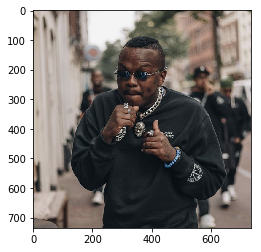

In [31]:
lista = list(foto.keys())
image = plt.imread(lista[0])
plt.imshow(image)

In [0]:
#Função auxiliar para tratar os limites
def trunc(x):
  x = np.trunc(x)
  if x > 255:
    x = 255
  elif x < 0:
    x = 0
  return x

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


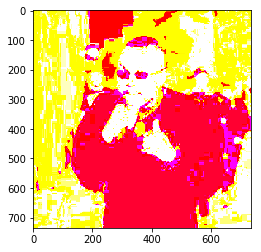

In [33]:
#Conversor RGB-YIQ
tmp_im = np.zeros(image.shape, dtype="float32")


x,y, z = tmp_im.shape

for i in range(x):
  for j in range(y): 
    tmp_im[i,j,0] = (image[i,j,0]*0.299 + image[i,j,1]*0.587 + image[i,j,2]*0.114)
   
    tmp_im[i,j,1] = (0.596*image[i,j,0] - 0.274*image[i,j,1] - 0.322*image[i,j,2])
   
    tmp_im[i,j,2] = (0.211*image[i,j,0] - 0.523*image[i,j,1] + 0.312*image[i,j,2])

plt.imshow(tmp_im)

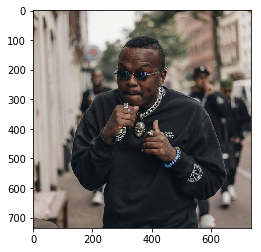

In [34]:
#Conversor YIQ-RGB
temp_im = np.zeros(tmp_im.shape, dtype="uint8") 
x,y, z = temp_im.shape

for i in range(x):
  for j in range(y):  
    temp_im[i,j,0] = trunc(((tmp_im[i,j,0]*1.000) + tmp_im[i,j,1]*0.956 + tmp_im[i,j,2]*0.621))

      
    temp_im[i,j,1] = trunc((1.000*tmp_im[i,j,0] - 0.272*tmp_im[i,j,1] - 0.647*tmp_im[i,j,2]))

      
    temp_im[i,j,2] = trunc((1.000*tmp_im[i,j,0] - 1.106*tmp_im[i,j,1] + 1.703*tmp_im[i,j,2]))



plt.imshow((temp_im))

# Exibição de bandas individuais

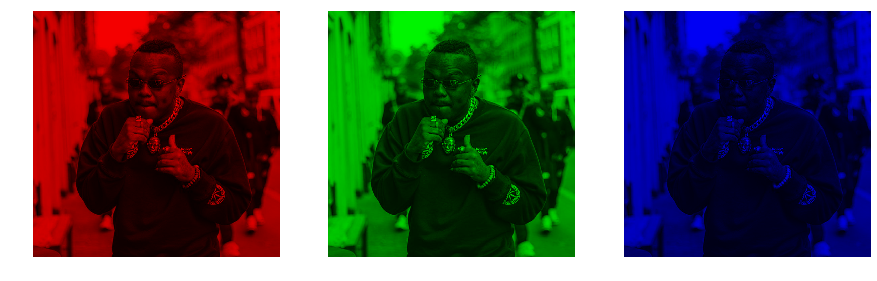

In [35]:
#Uma banda por vez
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), axs):
    tmp_im1 = np.zeros(image.shape, dtype="uint8")
    tmp_im1[:,:,c] = image[:,:,c]
    ax.imshow(tmp_im1)
    ax.set_axis_off()
   

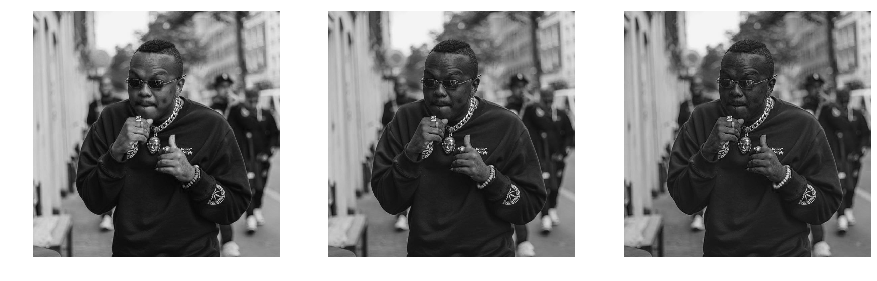

In [36]:
#Monocromático
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), axs):
    tmp_im2 = np.zeros(image.shape, dtype="uint8")
    tmp_im2[:,:,0] = image[:,:,c]
    tmp_im2[:,:,1] = image[:,:,c]
    tmp_im2[:,:,2] = image[:,:,c]
    ax.imshow(tmp_im2)
    ax.set_axis_off()
    
   

# Negativo de uma imagem

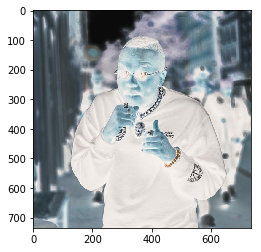

In [37]:
tmp_im2 = np.zeros(image.shape, dtype="uint8")
tmp_im2[:,:,0] = 255-  image[:,:,0]
tmp_im2[:,:,1] = 255 - image[:,:,1]
tmp_im2[:,:,2] = 255 - image[:,:,2]
plt.imshow(tmp_im2)

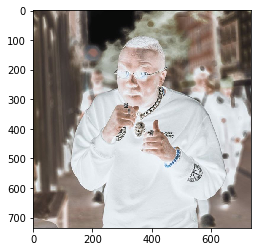

In [38]:
#Negativo no YIQ

tmp_im = np.zeros(image.shape, dtype="float32")


x,y, z = tmp_im.shape

for i in range(x):
  for j in range(y): 
    tmp_im[i,j,0] = 255 - (image[i,j,0]*0.299 + image[i,j,1]*0.587 + image[i,j,2]*0.114)
   
    tmp_im[i,j,1] = (0.596*image[i,j,0] - 0.274*image[i,j,1] - 0.322*image[i,j,2])
   
    tmp_im[i,j,2] = (0.211*image[i,j,0] - 0.523*image[i,j,1] + 0.312*image[i,j,2])
    
temp_im = np.zeros(tmp_im.shape, dtype="uint8") 
x,y, z = temp_im.shape

for i in range(x):
  for j in range(y):  
    temp_im[i,j,0] = trunc(((tmp_im[i,j,0]*1.000) + tmp_im[i,j,1]*0.956 + tmp_im[i,j,2]*0.621))

      
    temp_im[i,j,1] = trunc((1.000*tmp_im[i,j,0] - 0.272*tmp_im[i,j,1] - 0.647*tmp_im[i,j,2]))

      
    temp_im[i,j,2] = trunc((1.000*tmp_im[i,j,0] - 1.106*tmp_im[i,j,1] + 1.703*tmp_im[i,j,2]))



plt.imshow((temp_im))

#Controle de brilho multiplicativo

In [0]:
def brilho_mult(imagem,c):
  tmp_im2 = np.zeros(image.shape, dtype="uint8")
  x,y, z = tmp_im.shape

  for i in range(x):
    for j in range(y):  
      tmp_im2[i,j,0] = trunc(image[i,j,0] * c)

      tmp_im2[i,j,1] = trunc(image[i,j,1] * c)

      tmp_im2[i,j,2] = trunc(image[i,j,2] * c)

  return tmp_im2  

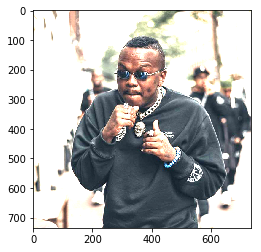

In [41]:
plt.imshow(brilho_mult(image, 2.5))

#Convolução m x n

In [0]:
#Função para aplicar a convolução 2d

def conv2d(imagem, kernel):
  

  kernel = np.flipud(np.fliplr(kernel))
  x_kernel, y_kernel = kernel.shape[:2]
  preenchimento = (y_kernel-1) // 2
  tmp_im4 = np.zeros(imagem.shape)
  #Nova imagem com extensão por 0's. Adiociona bordas superiores e inferiores
  imagem_extensao = np.zeros((imagem.shape[0] + 2*preenchimento, imagem.shape[1] + 2*preenchimento))
  imagem_extensao[preenchimento:-preenchimento, preenchimento:-preenchimento] = imagem
  
  
  #Itera sobre os pixels da imagem. A imagem de saída, em (x,y), é dada pela soma dos produtos entre o kernel e a imagem contida no kernel 
  for x in range(imagem.shape[0]):
    for y in range(imagem.shape[1]):
      porcao = imagem_extensao[x:x+(2*preenchimento)+1, y:y+(2*preenchimento)+1]
      tmp_im4[x, y] = (kernel * porcao).sum()
  
      
  return tmp_im4
 


In [0]:
def convolucao(imagem, kernel):
  imagens = []
  
  #Aplica convolução aos 3 canais
  for x in range(3):
    imagem_s = conv2d(imagem[:,:,x], kernel)
    imagens.append(imagem_s)
  
  #Junta uma sequencia de arrays em um eixo. Neste caso, no eixo dos canais. 
  imagem_saida = np.stack(imagens,axis=2).astype("uint8")
  
  return imagem_saida 

In [0]:
#Implementação do sobel
def sobel(imagem):
  x_sobel = np.c_[
      [-1,0,1],
      [-2,0,2],
      [-1,0,1]
  ]

  y_sobel = np.c_[
      [1,2,1],
      [0,0,0],
      [-1,-2,-1]
  ]
  imagens = []
  for d in range(3):
      sobelx = conv2d(imagem[:,:,d], x_sobel)
      sobely = conv2d(imagem[:,:,d], y_sobel)
      imagens.append(np.absolute(np.absolute(sobelx) + np.absolute(sobely)))

  imagem_saida = np.stack(imagens, axis=2).astype("uint8") 

  

  
  return imagem_saida

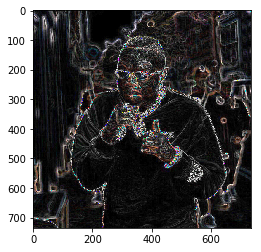

In [45]:
#Filtro sobel    
plt.imshow(sobel(image))

In [0]:
#Função auxiliar para ler o kernel via txt
def arquivo(path):
  kernel = []
  for line in open(path):
    line = line.rstrip()
    aux = line.split(" ")
    aux = list(map(int, aux))
    kernel.append(aux)
  return kernel

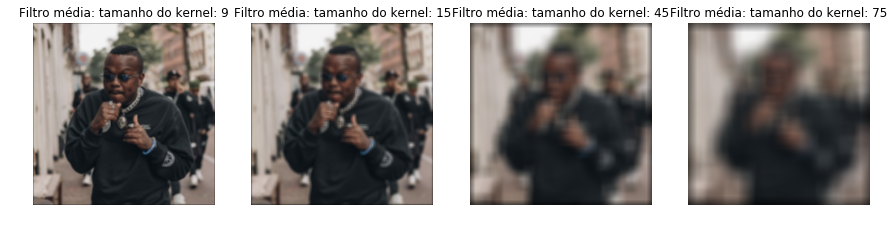

In [48]:
# Filtro média
#Adicione os tamanhos (ímpares) do kernel a serem testados
tam_kernel = [9,15, 45,75]#@param {type:"raw"}
fig, axs = plt.subplots(nrows=1, ncols=len(tam_kernel), figsize=(15,15));

for n, ax in zip(tam_kernel, axs):
    kernel = np.ones((n,n))
    kernel /= np.sum(kernel)
    ax.imshow(convolucao(image, kernel));
    ax.set_title("Filtro média: tamanho do kernel: {}".format(n));
    ax.set_axis_off()
    

    

Saving kernel.txt to kernel (1).txt


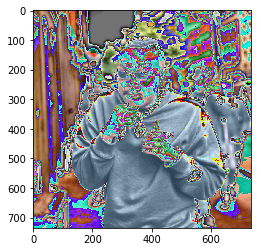

In [50]:
#@markdown ###Deseja inserir um kernel via txt?
leitura_via_txt = True #@param {type:"boolean"}
if leitura_via_txt:
  #@markdown ---
  #@markdown ###Escolha o txt contendo o kernel:
  path = files.upload()
  lista = list(path.keys())
  kernel_name = lista[0]
  kernel = arquivo(kernel_name)
  tam_kernel = len(kernel) * len(kernel)
  kernel /= np.sum(tam_kernel)
  plt.imshow(convolucao(image,kernel))

# Mediana m x n

In [0]:
#IMPLEMENTAÇÃO DA MEDIANA
def med2d(imagem, tam_kernel):
  
  preenchimento = (tam_kernel - 1) // 2
  tmp_im6 = np.zeros_like(imagem)
  #Nova imagem com extensão por 0's. Adiociona bordas superiores e inferiores
  imagem_extensao = np.zeros((imagem.shape[0] + 2*preenchimento, imagem.shape[1] + 2*preenchimento))
  imagem_extensao[preenchimento:-preenchimento, preenchimento:-preenchimento] = imagem
  
  #Itera sobre os pixels da imagem. A imagem de saída, em (x,y), é dada pela soma dos produtos entre o kernel e a imagem contida no kernel 
  for x in range(imagem.shape[0]):
    for y in range(imagem.shape[1]):
      porcao = imagem_extensao[x:x+(2*preenchimento)+1, y:y+(2*preenchimento)+1]
      tmp_im6[x, y] = np.median(porcao)
  
      
  return tmp_im6
  
  

In [0]:
def mediana(imagem, tam_kernel):
  imagens = []
  
  #Aplica convolução aos 3 canais
  for x in range(3):
    imagem_s = med2d(imagem[:,:,x], tam_kernel) 
    imagens.append(imagem_s)
  
  #Junta uma sequencia de arrays em um eixo. Neste caso, no eixo dos canais. 
  imagem_saida = np.stack(imagens,axis=2).astype("uint8")
  
  return imagem_saida

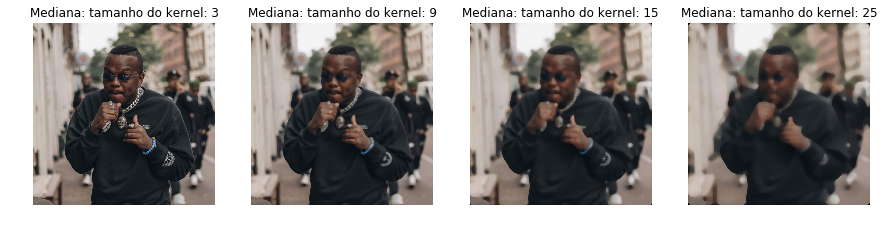

In [53]:
# Filtro mediana
#Adicione os tamanhos (ímpares) do kernel a serem testados
tam_kernel = [3,9,15,25]#@param {type:"raw"}
fig, axs = plt.subplots(nrows=1, ncols=len(tam_kernel), figsize=(15,15));

for n, ax in zip(tam_kernel, axs):
    ax.imshow(mediana(image, n));
    ax.set_title("Mediana: tamanho do kernel: {}".format(n));
    ax.set_axis_off()
